## 모듈 임포트

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

import ta

## 데이터 준비

In [2]:
years = ['2018', '2019', '2020', '2021', '2022', '2023']

upbits = []

for year in years:
    df = pd.read_csv(f'DATA/upbit_{year}_1d_krw_BTC.csv')
    upbits.append(df)

upbit = pd.concat(upbits, ignore_index=True).drop_duplicates(ignore_index=True)
upbit

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2017-12-05,2017-12-05T09:00:00,13683000.0,14794000.0,13612000.0,14645000.0,1512518400020,3.933544e+11,27842.824832,13684000.0,961000.0,0.070228
1,KRW-BTC,2017-12-06,2017-12-06T09:00:00,14645000.0,19006000.0,14645000.0,18390000.0,1512604740000,7.644868e+11,46874.815723,14645000.0,3745000.0,0.255719
2,KRW-BTC,2017-12-07,2017-12-07T09:00:00,18389000.0,23860000.0,17965000.0,23791000.0,1512691200081,1.118270e+12,55171.056944,18390000.0,5401000.0,0.293692
3,KRW-BTC,2017-12-08,2017-12-08T09:00:00,23795000.0,24967000.0,16521000.0,20260000.0,1512777600070,2.070532e+12,101681.962251,23791000.0,-3531000.0,-0.148417
4,KRW-BTC,2017-12-09,2017-12-09T09:00:00,20259000.0,20877000.0,15257000.0,17769000.0,1512864000151,1.017294e+12,57286.612720,20260000.0,-2491000.0,-0.122952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,57032000.0,888000.0,0.015570
2214,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,57920000.0,-1013000.0,-0.017490
2215,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,56907000.0,-457000.0,-0.008031
2216,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,56450000.0,189000.0,0.003348


In [3]:
upbit_BB = upbit[['candle_date_time_utc', 'trade_price']].copy()
close = upbit_BB['trade_price']

# 상단 밴드
upbit_BB['high'] = ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
# 종가가 상단밴드 돌파 시 1 return
upbit_BB['high_ind'] = ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)

# 하한 밴드
upbit_BB['low'] = ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
# 종가가 하한밴드 돌파 시 1 return
upbit_BB['low_ind'] = ta.volatility.bollinger_lband_indicator(close, window=20, window_dev=2, fillna=False)

# 이동평균선
upbit_BB['mov'] = ta.volatility.bollinger_mavg(close, window=20, fillna=False)

# 밴드 폭
upbit_BB['width'] = ta.volatility.bollinger_wband(close, window=20, window_dev=2, fillna=False)

# condition = (upbit_BB['candle_date_time_utc'] >= '2018-01-01') & (upbit_BB['candle_date_time_utc'] <= '2023-12-31')
# upbit_BB = upbit_BB[condition]

In [4]:
upbit_BB['candle_date_time_utc'] = pd.to_datetime(upbit_BB['candle_date_time_utc'])
upbit_BB.set_index('candle_date_time_utc', inplace=True)

## 볼린저 밴드 시각화

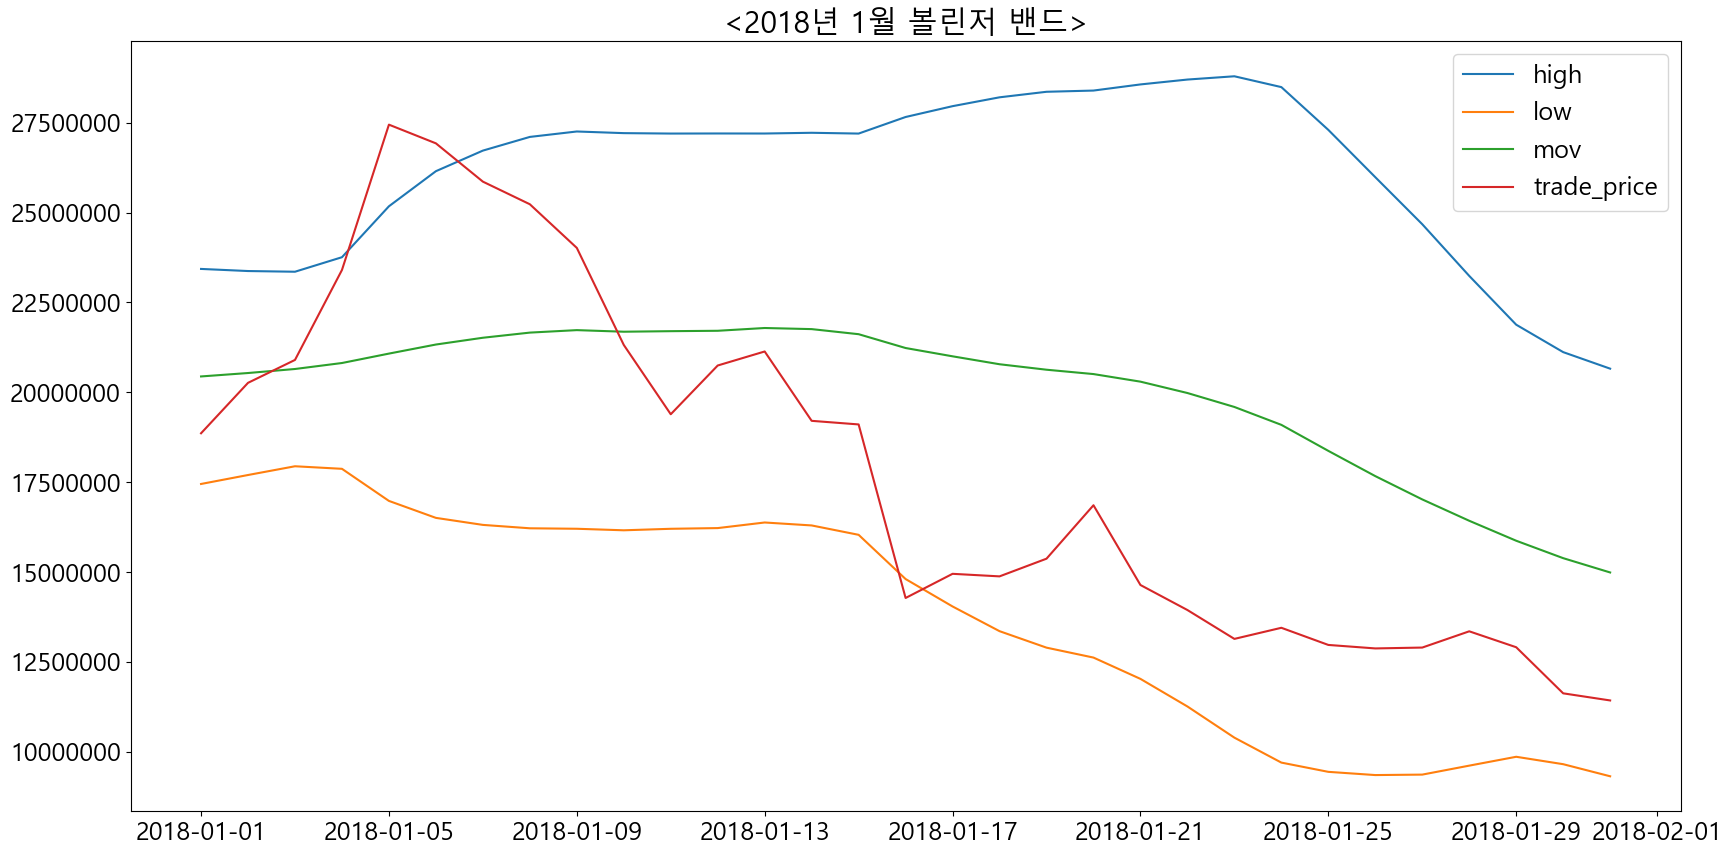

In [5]:
plt.figure(figsize=(20, 10))
plt.rc('font', size=18)

plt.plot(upbit_BB.loc[(upbit_BB.index.year==2018) & (upbit_BB.index.month==1)  ,['high', 'low', 'mov', 'trade_price']], label=['high', 'low', 'mov', 'trade_price'])

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.title("<2018년 1월 볼린저 밴드>")
plt.xlabel("")
plt.legend()
plt.show()

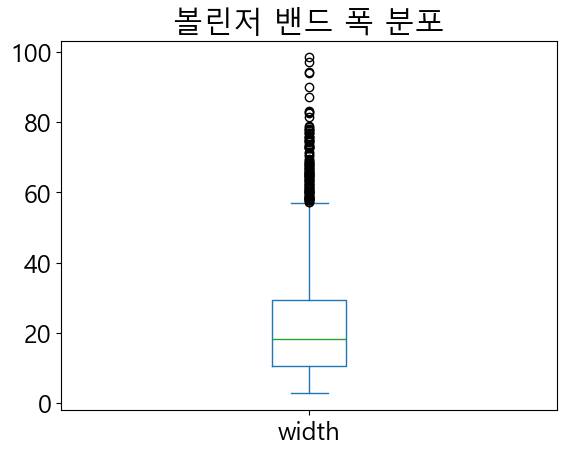

In [6]:
# 볼린저 밴드 폭 분포
upbit_BB['width'].plot(kind='box')
plt.title("볼린저 밴드 폭 분포")
plt.show()

## 전략 만들기

In [7]:
# 밴드 폭 기준 정하고 그 기준값보다 작은 것에 1표시하는 함수
def is_narrow(upbit, standard):
    # standard는 퍼센트로 넣는다. (구간 값 분포에서 전체의 몇 퍼센트 이하의 값)
    standard = upbit['width'].quantile(standard)
    upbit.loc[upbit['width'] <= standard, 'narrow'] = 1
    upbit.loc[upbit['width'] > standard, 'narrow'] = 0

    print(f"밴드 폭 기준값 : {standard}")


def is_narrow_rolling(upbit, n, standard):
    temp = upbit.copy()
    # n일동안 좁은 너비 여부를 더해서 standard가 넘으면 좁은 구간이라고 판단
    temp['narrow_rolling'] = temp['narrow'].rolling(n).sum()
    
    # 기간 한정
    temp = temp.loc['2018-01-01':'2023-12-31'].copy()
    
    # 좁은 구간 조건과 가격이 이평선 상향 돌파시 매수 시그널
    temp.loc[(temp['narrow_rolling'] > standard) & (temp['high_ind'] == 1), 'signal_buy'] = True
    # 가격이 이평선 하향 돌파시 매도 시그널
    temp.loc[temp['mov'] > temp['trade_price'], 'signal_sell'] = True

    return temp


def get_buy_sell_time(temp):
    # 매수, 매도 시그널 따로 데이터 프레임으로 만든다.
    buy_df = temp.loc[temp['signal_buy'] == True]
    sell_df = temp.loc[temp['signal_sell'] == True]
    
    # 매수 시점을 하나씩 비교해가며 매수 시점 이후의 가장 최근의 매도 시점을 묶어 하나의 매매로 만든다.
    idx = buy_df.index
    
    buy = idx[0]
    times = []
    
    while True:
        sell = sell_df.loc[buy:].iloc[0].name # 매도 시점
        times.append([buy, sell])
        if len(idx[idx > sell]) != 0:
            buy = idx[idx > sell][0]
        else:
            break
    
    buy_times = []
    sell_times = []
    for time in times:
        buy_times.append(time[0])
        sell_times.append(time[1])
    
    # print(f"매수시점 : {buy_times}")
    # print(f"매도시점 : {sell_times}")
    
    return buy_df, sell_df, buy_times, sell_times


def get_buy_sell_data(buy_df, sell_df, buy_times, sell_times):
    b = buy_df.loc[buy_times, 'trade_price']
    b.index.name = 'buy_time'
    b = b.reset_index()
    b = b.rename(columns={'trade_price': 'buy_price'})
    
    s = sell_df.loc[sell_times, 'trade_price']
    s.index.name = 'sell_time'
    s = s.reset_index()
    s = s.rename(columns={'trade_price': 'sell_price'})
    
    # buy와 sell 데이터프레임을 병합해서 수익률을 계산
    buy_sell = pd.concat([b, s], axis=1)
    buy_sell['profit'] = buy_sell['sell_price'] - buy_sell['buy_price']
    buy_sell['profit_rate'] = (buy_sell['profit'] / buy_sell['buy_price']) * 100
    
    return buy_sell

## 전략 1 평가

In [8]:
upbit_BB_copy = upbit_BB.copy()
is_narrow(upbit_BB_copy, 0.25)
temp = is_narrow_rolling(upbit_BB_copy, 20, 15)
buy_df, sell_df, buy_times, sell_times = get_buy_sell_time(temp)
buy_sell_df = get_buy_sell_data(buy_df, sell_df, buy_times, sell_times)
buy_sell_df

밴드 폭 기준값 : 10.696314819844352


,buy_time,buy_price,sell_time,sell_price,profit,profit_rate
0,2019-02-18,4236000.0,2019-03-04,4155000.0,-81000.0,-1.912181
1,2019-03-29,4641000.0,2019-04-29,6029000.0,1388000.0,29.907348
2,2020-07-22,11269000.0,2020-08-23,13802000.0,2533000.0,22.477593
3,2020-10-10,12864000.0,2020-12-08,20010000.0,7146000.0,55.550373
4,2022-10-25,28494000.0,2022-11-08,26650000.0,-1844000.0,-6.471538
5,2023-08-08,39437000.0,2023-08-17,36588000.0,-2849000.0,-7.224180
6,2023-09-19,36500000.0,2023-09-24,35534000.0,-966000.0,-2.646575
7,2023-10-01,37789000.0,2023-10-11,36671000.0,-1118000.0,-2.958533
8,2023-10-16,38697000.0,2023-11-21,48510000.0,9813000.0,25.358555
9,2023-12-01,51709000.0,2023-12-24,58002000.0,6293000.0,12.170028


In [9]:
def eval_strategy(buy_sell_df):
    print(f"누적수익률 : {((1 + buy_sell_df['profit_rate']/100).prod() -1) * 100} %")
    print(f"평균수익률 : {buy_sell_df['profit_rate'].mean()} %")

In [10]:
eval_strategy(buy_sell_df)

누적수익률 : 179.83013450285083 %
평균수익률 : 12.425088968374478 %


In [11]:
def total_view(upbit, buy_sell_df):
    plt.figure(figsize=(20,6))
    plt.rc('font', size=19)
    
    plt.plot(upbit.loc['2018-01-01':'2023-12-31', 'trade_price'], label='bitcoin_price', linewidth=1, color='green')
    
    plt.scatter(buy_sell_df['buy_time'], buy_sell_df['buy_price'], color='red', alpha=0.7, s=100, label='buy')
    plt.scatter(buy_sell_df['sell_time'], buy_sell_df['sell_price'], color='blue', alpha=0.7, s=100, label='sell')
    
    plt.ticklabel_format(axis='y',useOffset=False, style='plain')
    plt.legend()
    plt.title("<볼린저 밴드 이용한 투자 매수, 매도 시점>")
    plt.show()

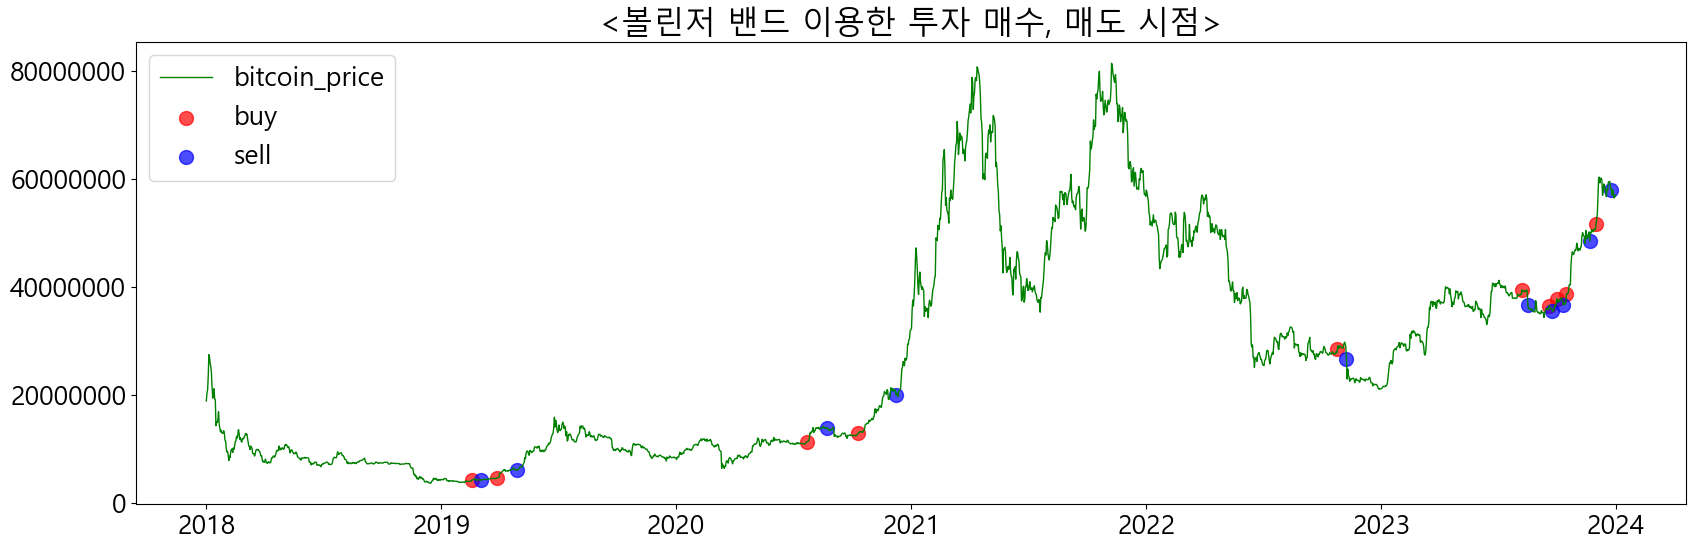

In [12]:
total_view(upbit_BB_copy, buy_sell_df)

In [13]:
def delicate_view(upbit, buy_sell_df, option='max'):
    plt.figure(figsize=(20,10))
    plt.rc('font', size=19)
    
    if option == 'max':
        profit_buy_time = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmax()]['buy_time']
        profit_buy_price = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmax()]['buy_price']
        
        profit_sell_time = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmax()]['sell_time']
        profit_sell_price = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmax()]['sell_price']
    elif option == 'min':
        profit_buy_time = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmin()]['buy_time']
        profit_buy_price = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmin()]['buy_price']
        
        profit_sell_time = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmin()]['sell_time']
        profit_sell_price = buy_sell_df.iloc[buy_sell_df['profit_rate'].idxmin()]['sell_price']
        
    start_date = profit_buy_time - pd.Timedelta(weeks=4)
    end_date = profit_sell_time + pd.Timedelta(weeks=1)
    
    plt.plot(upbit.loc[start_date:end_date, 'trade_price'], label='bitcoin_price', color='purple')
    
    plt.plot(upbit.loc[start_date:end_date, 'high'], label='high', linewidth=5)
    plt.plot(upbit.loc[start_date:end_date, 'low'], label='low', linewidth=5)
    plt.plot(upbit.loc[start_date:end_date, 'mov'], label='mov', linewidth=5)

    plt.scatter(profit_buy_time, profit_buy_price, label='buy', color='red', s=100)
    plt.scatter(profit_sell_time, profit_sell_price, label='sell', color='blue', s=100)
    
    if option == 'max':
        plt.title(f"<볼린저 밴드 이용한 투자 수익률 {option}구간 볼린저 밴드>")
    elif option == 'min':
        plt.title(f"<볼린저 밴드 이용한 투자 수익률 {option}구간 볼린저 밴드>")
        
    plt.ticklabel_format(axis='y',useOffset=False, style='plain')
    plt.legend()
    plt.show()

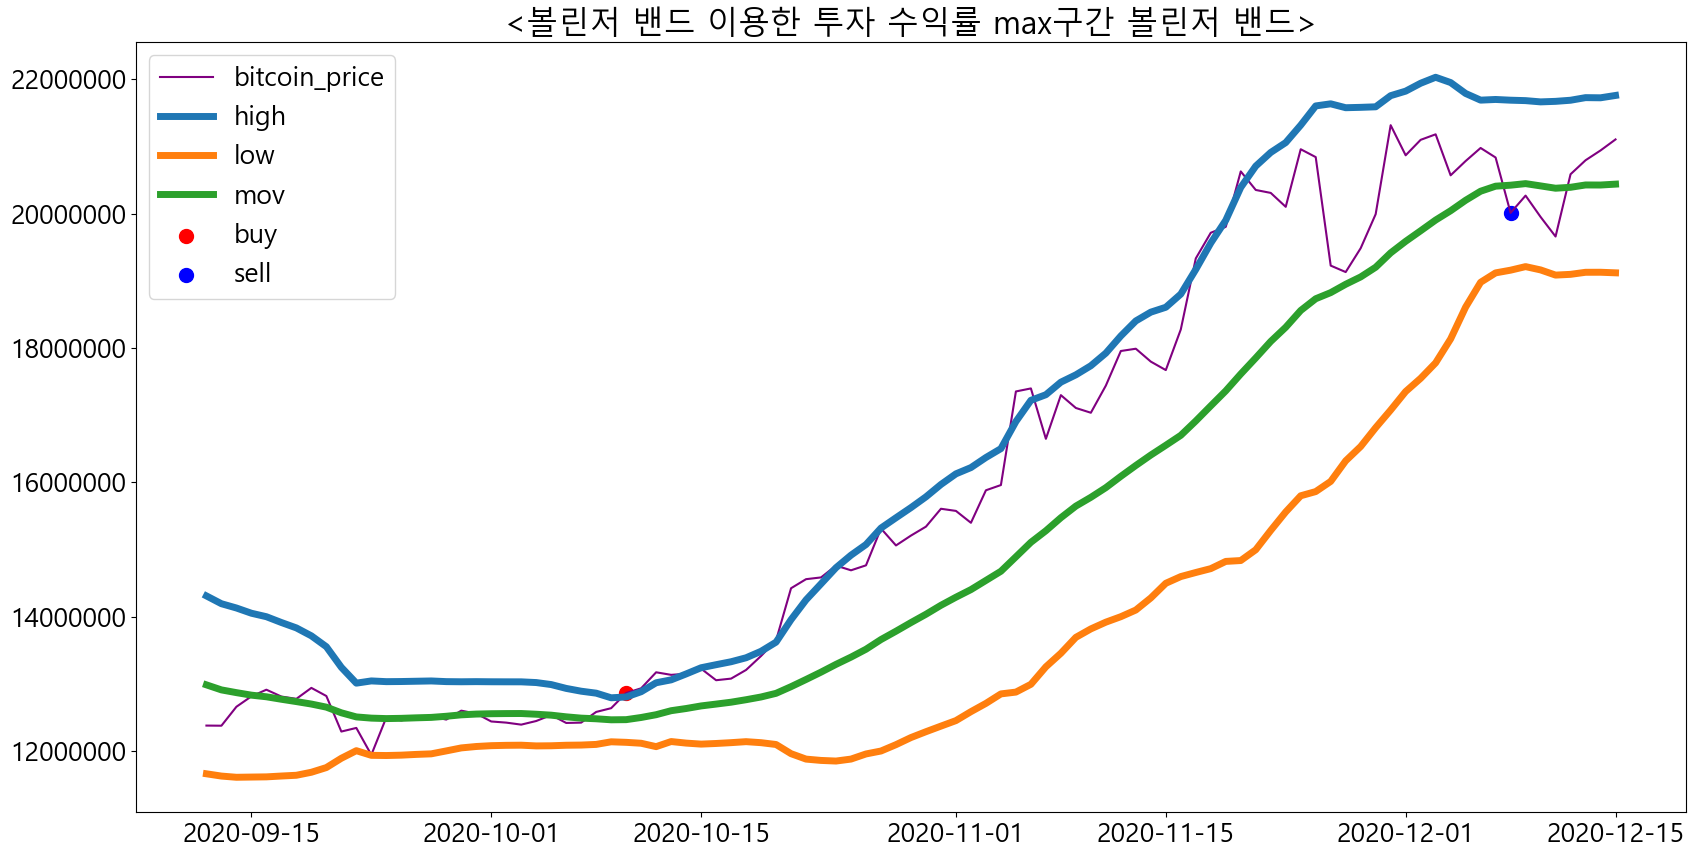

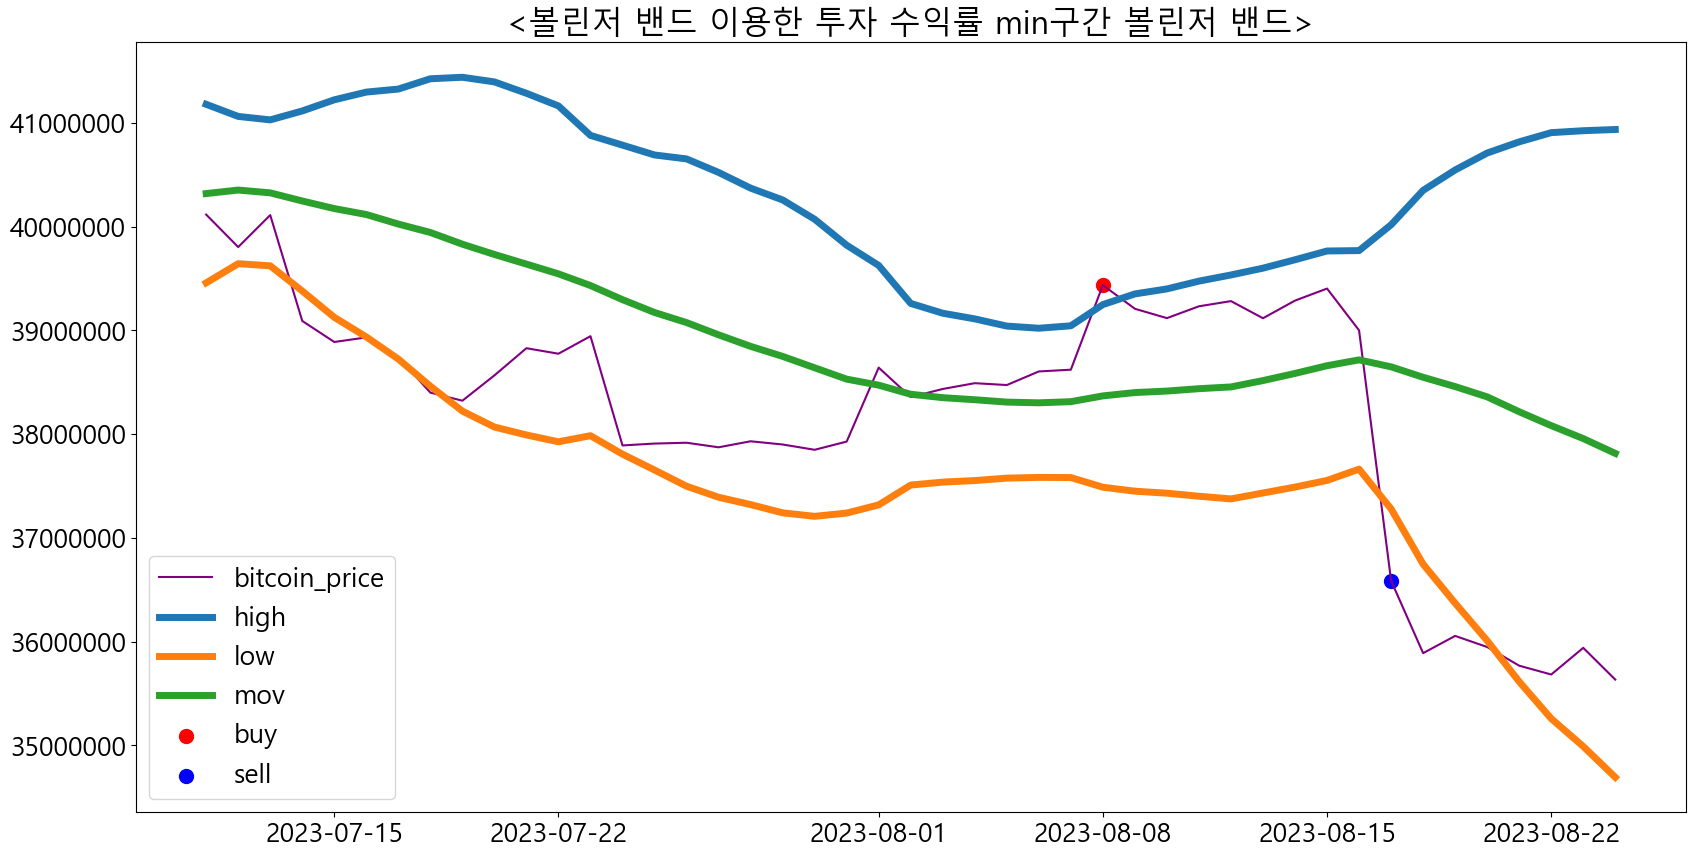

In [14]:
delicate_view(upbit_BB, buy_sell_df, 'max')
delicate_view(upbit_BB, buy_sell_df, 'min')

## 전략 2 평가

In [15]:
upbit_BB_copy = upbit_BB.copy()
is_narrow(upbit_BB_copy, 0.5)
temp = is_narrow_rolling(upbit_BB_copy, 15, 7)
buy_df, sell_df, buy_times, sell_times = get_buy_sell_time(temp)
buy_sell_df = get_buy_sell_data(buy_df, sell_df, buy_times, sell_times)
buy_sell_df

밴드 폭 기준값 : 18.376406381864488


,buy_time,buy_price,sell_time,sell_price,profit,profit_rate
0,2018-07-17,8080000.0,2018-08-03,8508000.0,428000.0,5.297030
1,2018-08-29,7825000.0,2018-09-06,7523000.0,-302000.0,-3.859425
2,2019-02-18,4236000.0,2019-03-04,4155000.0,-81000.0,-1.912181
3,2019-03-16,4445000.0,2019-04-29,6029000.0,1584000.0,35.635546
4,2019-05-03,6596000.0,2019-06-04,9486000.0,2890000.0,43.814433
5,2019-06-17,11055000.0,2019-07-11,13770000.0,2715000.0,24.559023
6,2019-10-26,10730000.0,2019-11-08,10212000.0,-518000.0,-4.827586
7,2020-01-06,8866000.0,2020-02-25,11330000.0,2464000.0,27.791563
8,2020-04-24,9100000.0,2020-05-21,11089000.0,1989000.0,21.857143
9,2020-06-01,12112000.0,2020-06-11,11090000.0,-1022000.0,-8.437913


In [16]:
eval_strategy(buy_sell_df)

누적수익률 : 1350.885863505726 %
평균수익률 : 10.077408694283603 %


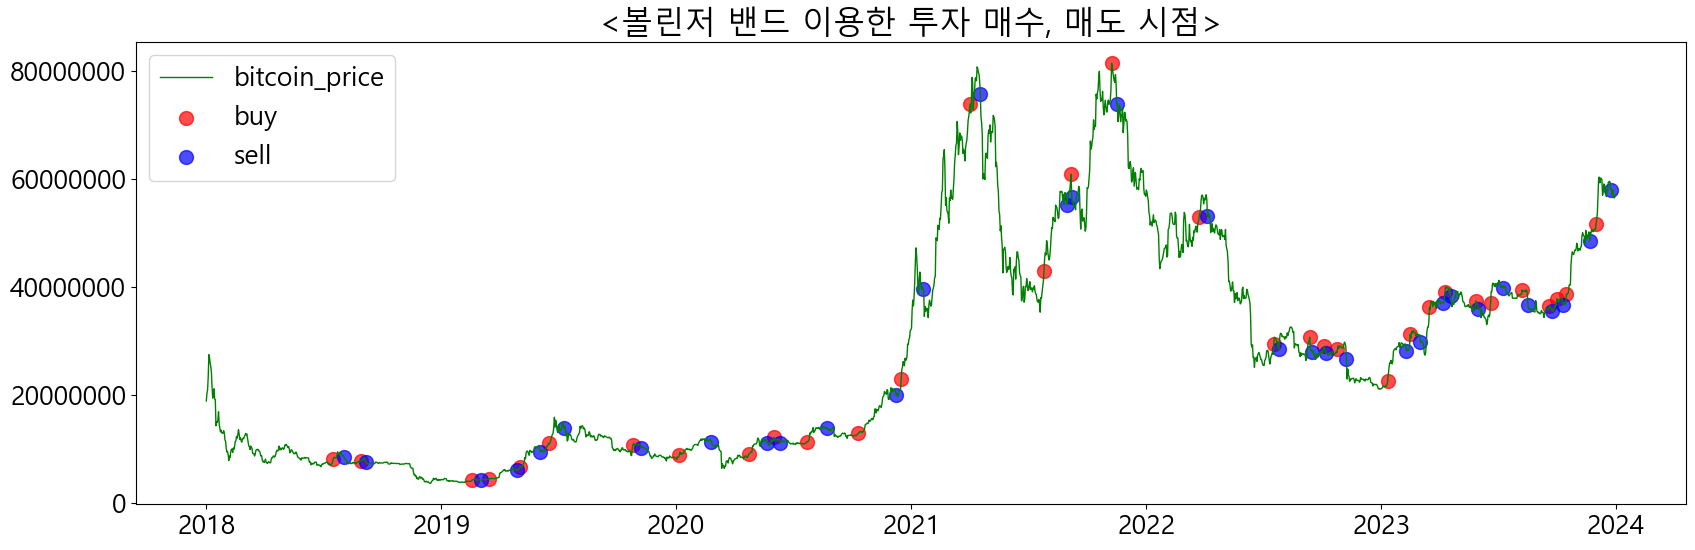

In [17]:
total_view(upbit_BB_copy, buy_sell_df)

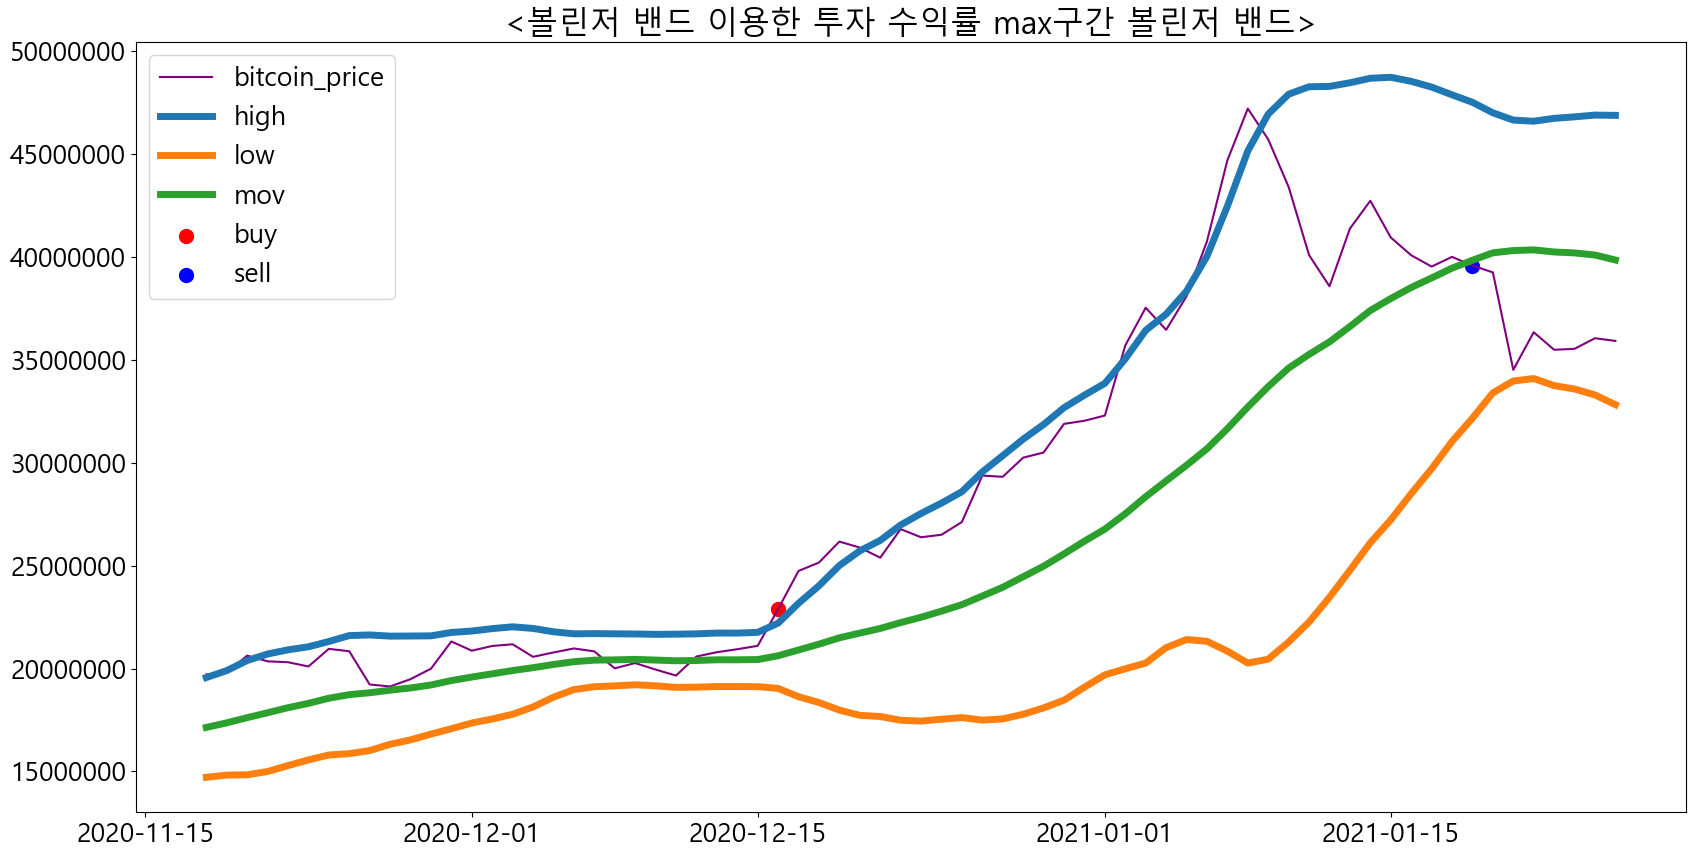

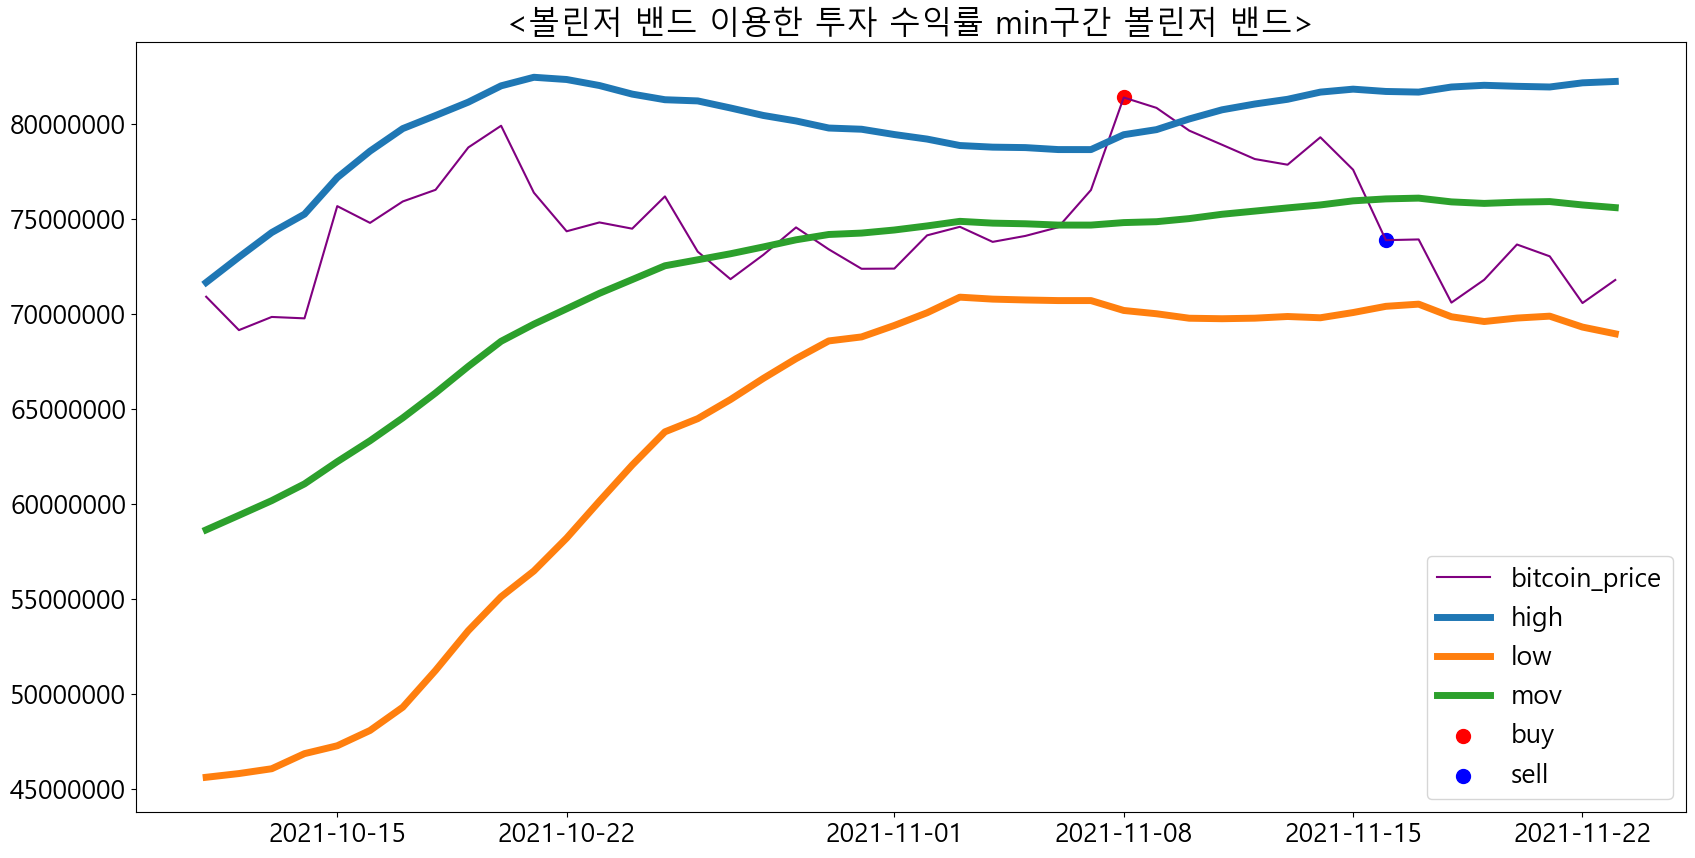

In [18]:
delicate_view(upbit_BB, buy_sell_df, 'max')
delicate_view(upbit_BB, buy_sell_df, 'min')

In [19]:
# 단순 홀딩 수익률
start_price = upbit_BB['2018-01-01':'2023-12-31']['trade_price'].iloc[0]
end_price = upbit_BB['2018-01-01':'2023-12-31']['trade_price'].iloc[-1]

simplie_holding_profit_rate = ((end_price - start_price) / start_price) * 100
simplie_holding_profit_rate

202.4761399787911